## LightGBM

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'MANEUVER', 'SEX', 'AGE'],
      dtype='object')

In [4]:
df

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,MANEUVER,SEX,AGE
0,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12,6,8,STRAIGHT AHEAD,M,45.0
1,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12,6,8,STRAIGHT AHEAD,M,69.0
2,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12,6,8,STRAIGHT AHEAD,M,45.0
3,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12,6,8,STRAIGHT AHEAD,M,69.0
4,30,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,17,6,8,STRAIGHT AHEAD,M,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759915,15,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,17,4,5,STRAIGHT AHEAD,F,69.0
1759916,15,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,17,4,5,STRAIGHT AHEAD,M,37.0
1759917,15,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,17,4,5,STRAIGHT AHEAD,F,69.0
1759918,15,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,17,4,5,PARKED IN TRAFFIC LANE,M,37.0


In [5]:
input_cols = [
       'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'MANEUVER', 'SEX', 'AGE'
       ]
output_col = ['FIRST_CRASH_TYPE']


In [6]:
# Label Encoding categorical features
label_encoders = {}
for col in input_cols + output_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

In [7]:
joblib.dump(label_encoders, 'LGBM_encoders.joblib')

['LGBM_encoders.joblib']

In [8]:
label_encoders = joblib.load('LGBM_encoders.joblib')

In [12]:
df_sample = df.sample(frac=0.5, random_state=42)

In [13]:
X = df_sample[input_cols]
y = df_sample[output_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 703968, number of used features: 15
[LightGBM] [Info] Start training from score -1.844746
[LightGBM] [Info] Start training from score -8.376892
[LightGBM] [Info] Start training from score -4.169990
[LightGBM] [Info] Start training from score -4.335358
[LightGBM] [Info] Start training from score -7.069227
[LightGBM] [Info] Start training from score -5.659829
[LightGBM] [Info] Start training from score -8.217464
[LightGBM] [Info] Start training from score -2.431293
[LightGBM] [Info] Start training from score -4.773510
[LightGBM] [Info] Start training from score -4.371918
[LightGBM] [Info] Start training from score -1.293939
[LightGBM] [Info] Start training from score -4.051044

LGBMClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.6126187553979726


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58     27903
           1       0.00      0.00      0.00        32
           2       0.30      0.10      0.15      2705
           3       0.39      0.15      0.22      2334
           4       0.05      0.05      0.05       181
           5       0.12      0.07      0.09       626
           6       0.00      0.02      0.01        45
           7       0.67      0.61      0.64     15410
           8       0.06      0.01      0.01      1539
           9       0.13      0.02      0.03      2264
          10       0.60      0.82      0.70     48145
          11       0.36      0.44      0.40      2914
          12       0.23      0.21      0.22       615
          13       0.28      0.16      0.21      1945
          14       0.28      0.07      0.11      2850
          15       0.59      0.53      0.56     30621
          16       0.00      0.00      0.00        13
          17       0.81    

In [18]:
model.score(X_test, y_test)

0.6126187553979726

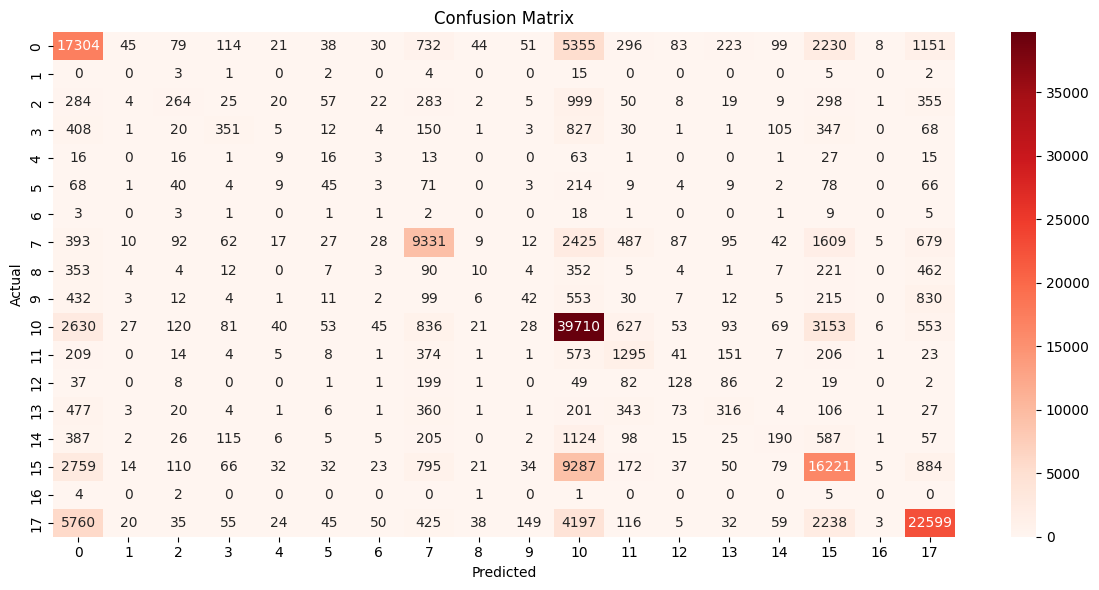

In [19]:
y_true = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
cm = confusion_matrix(y_test, y_pred)
class_labels = [str(lbl) for lbl in np.unique(np.concatenate((y_true, y_pred)))]
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [20]:
joblib.dump(model, 'lightGBM.joblib')

['lightGBM.joblib']

In [21]:
model = joblib.load('lightGBM.joblib')

In [22]:
def predict_custom_input(model, input_dict, input_cols, label_encoder, output_col = 'FIRST_CRASH_TYPE'):
    df = pd.DataFrame([input_dict])
    for col in input_cols:
        df[col] = label_encoder[col].transform([df[col][0]])

    prediction = model.predict(df)

    return label_encoder[output_col].inverse_transform(prediction)[0]

In [23]:
custom_input = {
    'POSTED_SPEED_LIMIT': '30',
    'WEATHER_CONDITION':'CLEAR',
    'LIGHTING_CONDITION':'DAYLIGHT',
    'TRAFFICWAY_TYPE':'FOUR WAY',
    'ALIGNMENT':'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND':'DRY',
    'ROAD_DEFECT':'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE':'FAILING TO REDUCE SPEED TO AVOID CRASH',
    'SEC_CONTRIBUTORY_CAUSE':'DISTRACTION - FROM INSIDE VEHICLE',
    'CRASH_HOUR': '12',
    'CRASH_DAY_OF_WEEK':'6',
    'CRASH_MONTH':'8',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'M',
    'AGE': '35.0'
}

prediction = predict_custom_input(model,custom_input,input_cols,label_encoders)

print("Predicted First Crash Type:", prediction)

Predicted First Crash Type: REAR END


In [24]:
custom_input = {
    'POSTED_SPEED_LIMIT': '50',
    'WEATHER_CONDITION':'CLEAR',
    'LIGHTING_CONDITION':'DAYLIGHT',
    'TRAFFICWAY_TYPE':'ONE-WAY',
    'ALIGNMENT':'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND':'DRY',
    'ROAD_DEFECT':'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE':'IMPROPER LANE USAGE',
    'SEC_CONTRIBUTORY_CAUSE':'NOT APPLICABLE',
    'CRASH_HOUR': '12',
    'CRASH_DAY_OF_WEEK':'6',
    'CRASH_MONTH':'8',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'M',
    'AGE': '35.0'
}

prediction = predict_custom_input(model,custom_input,input_cols,label_encoders)

print("Predicted First Crash Type:", prediction)

Predicted First Crash Type: SIDESWIPE SAME DIRECTION


In [25]:
custom_input = {
    'POSTED_SPEED_LIMIT': '35',
    'WEATHER_CONDITION':'CLEAR',
    'LIGHTING_CONDITION':'DARKNESS',
    'TRAFFICWAY_TYPE':'FOUR WAY',
    'ALIGNMENT':'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND':'WET',
    'ROAD_DEFECT':'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE':'UNABLE TO DETERMINE',
    'SEC_CONTRIBUTORY_CAUSE':'UNABLE TO DETERMINE',
    'CRASH_HOUR': '6',
    'CRASH_DAY_OF_WEEK':'3',
    'CRASH_MONTH':'8',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'F',
    'AGE': '35.0'
}

prediction = predict_custom_input(model,custom_input,input_cols,label_encoders)

print("Predicted First Crash Type:", prediction)

Predicted First Crash Type: ANGLE


In [26]:
custom_input = {
    'POSTED_SPEED_LIMIT': '25',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'ONE-WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'CRASH_DAY_OF_WEEK': '5',
    'ROADWAY_SURFACE_COND': 'ICE',
    'ROAD_DEFECT': 'NO DEFECTS',
    'PRIM_CONTRIBUTORY_CAUSE': 'IMPROPER TURNING/NO SIGNAL',
    'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
    'CRASH_HOUR': '7',
    'CRASH_MONTH': '12',
    'MANEUVER': 'SLOW/STOP IN TRAFFIC',
    'SEX': 'F',
    'AGE': '28.0'
}

prediction = predict_custom_input(model,custom_input,input_cols,label_encoders)

print("Predicted First Crash Type:", prediction)

Predicted First Crash Type: TURNING
